<a href="https://colab.research.google.com/github/yevintheenura01/DL_Assignment/blob/Yevin/pre_requirements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'diabetes-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-prediction-dataset


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import joblib

In [49]:
# Load dataset
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [50]:
df.shape

(100000, 9)

In [51]:
print(df.info())  # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [52]:
print(df.describe()) # Summary stats for numerical columns

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

/tmp/ipython-input-1187025268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=df, palette='viridis')


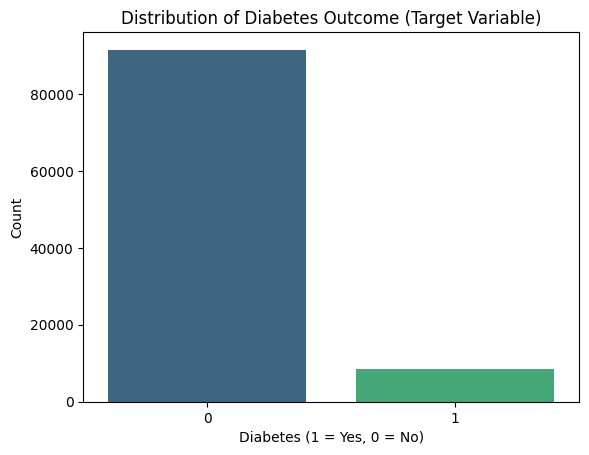

In [53]:
# Count of diabetic (1) vs non-diabetic (0)
sns.countplot(x='diabetes', data=df, palette='viridis')
plt.title('Distribution of Diabetes Outcome (Target Variable)')
plt.xlabel('Diabetes (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

In [54]:
df['diabetes'].value_counts(normalize=True)

,proportion
diabetes,
0,0.915
1,0.085


In [55]:
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)

Duplicate Rows: 3854


In [56]:
# Remove duplicates
df = df.drop_duplicates()
print("New Shape:", df.shape)

New Shape: (96146, 9)


In [57]:
df['smoking_history'].isnull().sum()

np.int64(0)

In [58]:
# 3️⃣ Encode categorical features
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['smoking_history'] = encoder.fit_transform(df['smoking_history'])

In [59]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the directory to save to in Google Drive
drive_output_dir = '/content/drive/MyDrive/DiabetesPrediction/outputs'

# Create the directory if it doesn't exist
os.makedirs(drive_output_dir, exist_ok=True)

# Save the encoder for later use
joblib.dump(encoder, os.path.join(drive_output_dir, 'label_encoder.pkl'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/DiabetesPrediction/outputs/label_encoder.pkl']

In [60]:
# -------------------------------
# 5️⃣ Handle outliers
# -------------------------------
for col in ['bmi', 'HbA1c_level', 'blood_glucose_level']:
    df[col] = np.clip(df[col], df[col].quantile(0.01), df[col].quantile(0.99))

In [61]:
# Features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

print("X shape:", X.shape)  # (100000, 12) after encoding
print("y shape:", y.shape)
print("Target distribution:\n", y.value_counts(normalize=True))  # ~0.65 non-diabetic, ~0.35 diabetic

X shape: (96146, 8)
y shape: (96146,)
Target distribution:
 diabetes
0    0.91178
1    0.08822
Name: proportion, dtype: float64


In [62]:
# 6️⃣ Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [63]:
# Save the scaler
joblib.dump(scaler, os.path.join(drive_output_dir, "scaler.pkl"))

['/content/drive/MyDrive/DiabetesPrediction/outputs/scaler.pkl']

/tmp/ipython-input-1847227901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


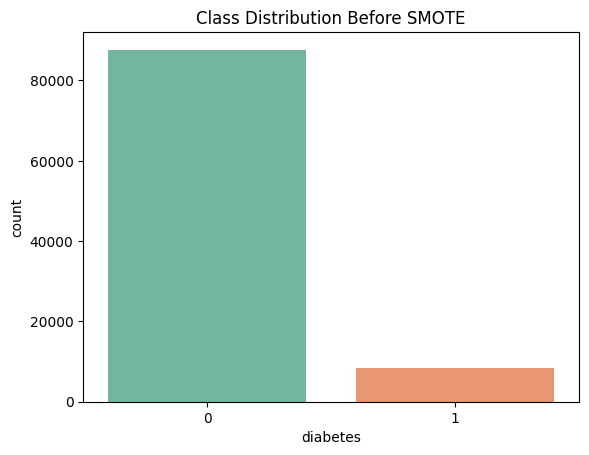

Before SMOTE:
 diabetes
0    87664
1     8482
Name: count, dtype: int64


In [64]:
# ------------------------------------------
# 9️⃣ Check imbalance before SMOTE
# ------------------------------------------
sns.countplot(x=y, palette="Set2")
plt.title("Class Distribution Before SMOTE")
plt.show()
print("Before SMOTE:\n", y.value_counts())


In [65]:
# ------------------------------------------
# 🔟 Apply SMOTE to balance the dataset
# ------------------------------------------
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

/tmp/ipython-input-477979998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="viridis")


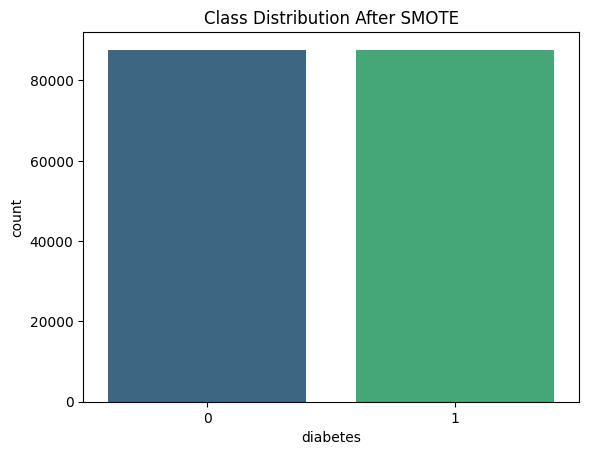

After SMOTE:
 diabetes
0    87664
1    87664
Name: count, dtype: int64


In [66]:
# ------------------------------------------
# 1️⃣1️⃣ Check class balance after SMOTE
# ------------------------------------------
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.show()
print("After SMOTE:\n", pd.Series(y_resampled).value_counts())

In [67]:
# ------------------------------------------
# 1️⃣2️⃣ Split train/test sets
# ------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [68]:
# -------------------------------
# 9️⃣ Save processed data to Google Drive
# -------------------------------
train_df = pd.DataFrame(X_train, columns=X.columns)
train_df['diabetes'] = y_train.values
train_df.to_csv(os.path.join(drive_output_dir, "clean_data_train.csv"), index=False)

test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['diabetes'] = y_test.values
test_df.to_csv(os.path.join(drive_output_dir, "clean_data_test.csv"), index=False)

print("✅ Preprocessing Complete.")
print(f"Clean data saved in {drive_output_dir}.")
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

✅ Preprocessing Complete.
Clean data saved in /content/drive/MyDrive/DiabetesPrediction/outputs.
Train Data Shape: (140262, 9)
Test Data Shape: (35066, 9)


/tmp/ipython-input-36347979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, ax=axes[0], palette='Set1')
/tmp/ipython-input-36347979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, ax=axes[1], palette='Set2')


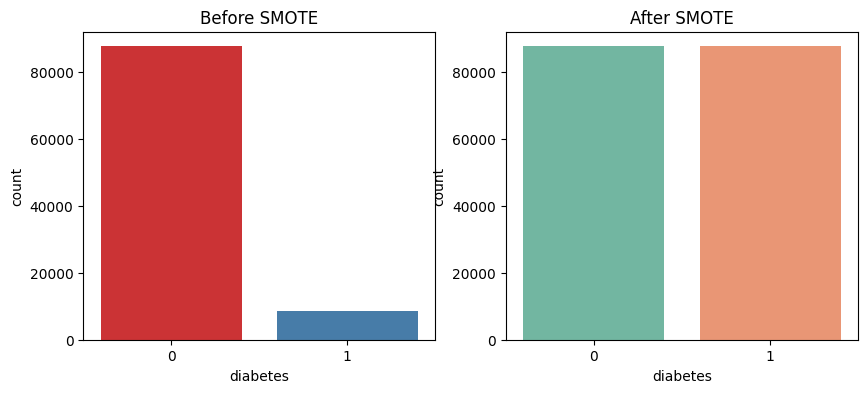

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x=y, ax=axes[0], palette='Set1')
axes[0].set_title("Before SMOTE")
sns.countplot(x=y_resampled, ax=axes[1], palette='Set2')
axes[1].set_title("After SMOTE")
plt.show()
